# EDUNET FOUNDATION - Self-Practice Exercise Notebook 

# LAB 10- Python Connection with Database

we will learn how to connect SQL with Python using the ‘MySQL Connector Python module. The diagram given below illustrates how a connection request is sent to MySQL connector Python, how it gets accepted from the database and how the cursor is executed with result data.
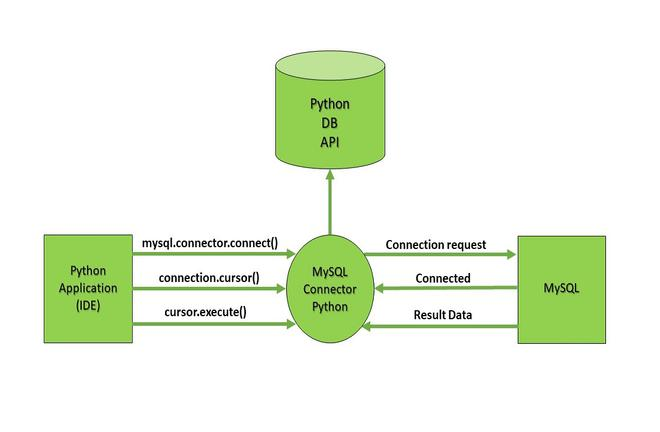

Connecting MySQL with Python
To create a connection between the MySQL database and Python, the connect() method of mysql.connector module is used. We pass the database details like HostName, username, and the password in the method call, and then the method returns the connection object.

The following steps are required to connect SQL with Python:

Step 1: Download and Install the free MySQL database

Step 2: After installing the MySQL database, open your Command prompt.

Step 3: Navigate your Command prompt to the location of PIP. 

Step 4: Now run the commands given below to download and install “MySQL Connector”. Here, mysql.connector statement will help you to communicate with the MySQL database.

Download and install “MySQL Connector”

In [ ]:
!pip install mysql-connector-python 

Step 5: Test MySQL Connector

To check if the installation was successful, or if you already installed “MySQL Connector”, go to your IDE and run the given below code :

In [ ]:
import mysql.connector


If the above code gets executed with no errors, “MySQL Connector” is ready to be used.

Step 6: Create Connection

Now to connect SQL with Python, run the code given below in your IDE.

In [ ]:
# Importing module
import mysql.connector

# Creating connection object
mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL"
)

# Printing the connection object
print(mydb)


In [ ]:
import mysql.connector  
#Create the connection object   
myconn = mysql.connector.connect(host = "localhost", user = "root",passwd = "MySQL")  
  
#printing the connection object   
print(myconn)   
  
#creating the cursor object  
cur = myconn.cursor()  
  
print(cur)  

In [ ]:
#creating the cursor object  
cur = myconn.cursor()  
  
try:  
    dbs = cur.execute("show databases")  
except:  
    myconn.rollback()  
for x in cur:  
    print(x)  
myconn.close()  

Creating a Table
To create a table in MySQL, use the "CREATE TABLE" statement.

Make sure you define the name of the database when you create the connection

Creating a table in MySQL using python
Import mysql. connector package.
Create a connection object using the mysql. connector. ...
Create a cursor object by invoking the cursor() method on the connection object created above.
Then, execute the CREATE TABLE statement by passing it as a parameter to the execute() method.

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

# Creating a table called 'STUDENT' in the
# 'mynewdatabase' database
mycursor.execute("CREATE TABLE customers (name VARCHAR(255), address VARCHAR(255))")



Check if Table Exists
You can check if a table exist by listing all tables in your database with the "SHOW TABLES" statement:

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)
cursor = mydb.cursor()

# Show existing tables
cursor.execute("SHOW TABLES")
 
for x in cursor:
  print(x)



Primary Key
When creating a table, you should also create a column with a unique key for each record.

This can be done by defining a PRIMARY KEY.

We use the statement "INT AUTO_INCREMENT PRIMARY KEY" which will insert a unique number for each record. Starting at 1, and increased by one for each record.

If the table already exists, use the ALTER TABLE keyword:

In [ ]:
#Create primary key on an existing table:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

mycursor.execute("ALTER TABLE customers ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")

In [ ]:
#Insert Into Table
#To fill a table in MySQL, use the "INSERT INTO" statement.

#ExampleGet your own Python Server
#Insert a record in the "customers" table:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

In [ ]:
#Insert Multiple Rows
#To insert multiple rows into a table, use the executemany() method.

#The second parameter of the executemany() method is a list of tuples, containing the data you want to insert:

#Fill the "customers" table with data:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

In [ ]:
#Get Inserted ID
#You can get the id of the row you just inserted by asking the cursor object.

#Note: If you insert more than one row, the id of the last inserted row is returned.

#Insert one row, and return the ID:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("Michelle", "Blue Village")
mycursor.execute(sql, val)

mydb.commit()

print("1 record inserted, ID:", mycursor.lastrowid)

In [ ]:
#Select From a Table
#To select from a table in MySQL, use the "SELECT" statement:
#Select all records from the "customers" table, and display the result:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [ ]:
#Selecting Columns
#To select only some of the columns in a table, use the "SELECT" statement followed by the column name(s):


#Select only the name and address columns:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)
mycursor = mydb.cursor()

mycursor.execute("SELECT name, address FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [ ]:
#Using the fetchone() Method
#If you are only interested in one row, you can use the fetchone() method.

#The fetchone() method will return the first row of the result

#Fetch only one row:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchone()

print(myresult)

In [ ]:
#Select With a Filter
#When selecting records from a table, you can filter the selection by using the "WHERE" statement:

#Select record(s) where the address is "Park Lane 38": result:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address ='Park Lane 38'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [ ]:
#Sort the Result
#Use the ORDER BY statement to sort the result in ascending or descending order.

#The ORDER BY keyword sorts the result ascending by default. To sort the result in descending order, use the DESC keyword.

#Sort the result alphabetically by name: result:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)


mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [ ]:
Update Table
You can update existing records in a table by using the "UPDATE" statement:

ExampleGet your own Python Server
Overwrite the address column from "Valley 345" to "Canyon 123":

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)


mycursor = mydb.cursor()

sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")

In [ ]:
#Delete Record
#You can delete records from an existing table by using the "DELETE FROM" statement:

#Delete any record where the address is "Mountain 21":

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

In [ ]:
#Delete a Table
#You can delete an existing table by using the "DROP TABLE" statement:

#ExampleGet your own Python Server
#Delete the table "customers":

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)

mycursor = mydb.cursor()

sql = "DROP TABLE customers"

mycursor.execute(sql)

In [ ]:
#Drop Only if Exist
#If the table you want to delete is already deleted, or for any other reason does not exist, you can use the IF EXISTS keyword to avoid getting an error.

#Delete the table "customers" if it exists:

import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "MySQL",
	database = "mynewdatabase"
)


mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS customers"

mycursor.execute(sql)